In [8]:
import sys

sys.path.insert(1, '../..')
#import ROOT

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from functions.other_functions import process_date, process_exposure, chi2, linear
import random
from tqdm import tqdm_notebook
%matplotlib inline 

In [53]:
def model(t, p0, p1, p2):
    y = []
    for i in range(len(t)):
        temp = 0
        for n in range(1,11):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t[i]/p1))
        f2 = (2/np.pi**2)*p1*temp
        y.append(p0*(t[i] + f2) + p2)
    return y


In [11]:
def model_day(x, p0, p1, p2):
    y = []
    for i in range(len(x)):
        t = x[i]*3600*24
        temp = 0
        for n in range(1,11):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t/p1))
        f2 = (2/np.pi**2)*p1*temp
        y.append(p0*(t + f2) + p2)
    return y

In [12]:
def linear_days(x, m, c):
    return m*x*3600*24 + c

In [13]:
def residual(y_obs, y_expected, y_err):
    return ((y_obs - y_expected)/y_err)

In [14]:
data_ch0 = np.loadtxt('/Users/willquinn/Desktop/pmt_output_files/apulse_num_ch0.txt', delimiter=',', unpack=True)
date = np.array(process_date(data_ch0[0]))
exposure = np.array(process_exposure(data_ch0[0]))
apulse_rates = data_ch0[1]
apulse_rates_err = data_ch0[2]/5
he_apulse_rates = data_ch0[3]
he_apulse_rates_err = data_ch0[4]/5

try:
    start = np.where(date == 0)[0][-1]
except:
    start = np.where(date == 1)[0][0]
mid = np.where(date == 98)[0][0]
date_days = date - 98
date = (date - 98)*24*60*60
print(process_date(data_ch0[0]))

[  0 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -14 -13 -12
 -10  -9  -8  -7  -6  -4  -3  -2   0   0   0   1   1   2   3   4   5   6
   7   8  10  11  12  13  14  15  16  17  18  19  21  22  23  24  25  26
  27  28  29  30  31  33  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 122 123 124 125 126 127 128 129 130 131 132 133 133
 134 135 136 137 138 139 140 141 142 148 149 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 194
 195 197 198 199 200 201 202 203 204 205 206 209 210 211 213 214 215 216
 217 218 219 221 222 223 224 225 226 227 228 229 23

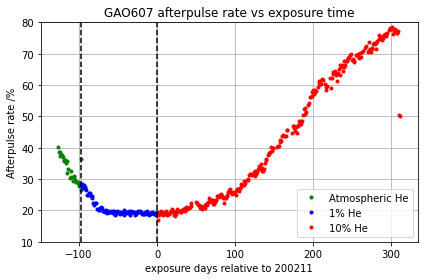

In [15]:
plt.plot(date_days[:start + 1], np.array(apulse_rates[:start + 1]),
                 "g.", label="Atmospheric He")
plt.plot(date_days[start+1:mid + 1], np.array(apulse_rates[start+1:mid + 1]),
                 "b.", label="1% He")
plt.plot(date_days[mid+1:], np.array(apulse_rates[mid+1:]),
                 "r.", label="10% He")
plt.axvline(date_days[start], 0, 100, ls='--', color='k')
plt.axvline(date_days[mid], 0, 100, ls='--', color='k')
plt.xlabel("exposure days relative to 200211")
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")
plt.grid()
plt.ylim(10,80)
plt.tight_layout()
plt.legend(loc='lower right')

In [16]:

#print(date[mid:], apulse_rates[mid:], apulse_rates_err[mid:])

In [17]:
chi_2 = 100
n_times = 1
n = 0
for n in range(n_times):
    p_bounds = [[0,0,18],[1e5,1e10,20]]
    '''p0 = random.uniform(p_bounds[0][0],p_bounds[1][0])
    p1 = random.uniform(p_bounds[0][1],p_bounds[1][1])
    p2 = random.uniform(p_bounds[0][2],p_bounds[1][2])
    p3 = random.uniform(p_bounds[0][3],p_bounds[1][3])
    p4 = random.uniform(p_bounds[0][4],p_bounds[1][4])'''
    p0 = 0.1
    p1 = 1
    p2 = 19
    p_guess = [p0, p1, p2]
    
    popt, pcov = curve_fit(model, date[mid+1:], apulse_rates[mid+1:], sigma=apulse_rates_err[mid+1:], p0=p_guess,
                           bounds=p_bounds)
    chi_2 = chi2(apulse_rates[mid+1:], apulse_rates_err[mid+1:], model(date[mid+1:], *popt), len(popt))
   
    if chi_2 < 1:
        break


print('Param p{}: {:.8f} ± {:.8f}'.format(0, popt[0], np.sqrt(pcov[0,0])))
print('Param p{}: {:.9f} ± {:.9f}'.format(1, popt[1], np.sqrt(pcov[1,1])))
print('Param p{}: {:.1f} ± {:.1f}'.format(2, popt[2], np.sqrt(pcov[2,2])))
print('Chi2 is:', chi_2)

Param p0: 0.00000312 ± 0.00000003
Param p1: 40237759.320744082 ± 0.000000024
Param p2: 19.0 ± 0.2
Chi2 is: 6.241677862745832


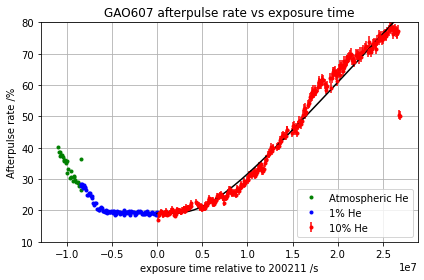

In [18]:
plt.plot(date[:start + 1], np.array(apulse_rates[:start + 1]),
                 "g.", label="Atmospheric He")
plt.plot(date[start+1:mid + 1], np.array(apulse_rates[start+1:mid + 1]),
                 "b.", label="1% He")
plt.errorbar(date[mid+1:], np.array(apulse_rates[mid+1:]), yerr=np.array(apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
x_range = np.linspace(0,date[-1],1000)
plt.plot(x_range, model(x_range, *popt), 'k')
#plt.axvline(date[start], 0, 100, ls='--', color='k')
#plt.axvline(date[mid], 0, 100, ls='--', color='k')
plt.xlabel("exposure time relative to 200211 /s")
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")
plt.grid()
plt.ylim(10,80)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model.png")

$C_g(t) = P_0 ( t + \frac{2}{\pi^2}P_1\sum^{10}_{n=1}\frac{(-1)^n}{n^2}(1 - e^{\frac{-n^2\pi^2t}{P_1}}) + P_2$

$P_0 = \frac{C_2D}{lV}$, $P_1 = \frac{l^2}{D} = 6L$

<ipython-input-19-7471f6468493>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


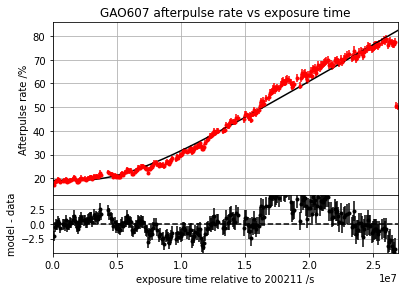

In [19]:
#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(date[mid+1:], np.array(apulse_rates[mid+1:]), yerr=np.array(apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
plt.plot(x_range, model(x_range, *popt), 'k')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,date[-1])
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(date[mid+1:], np.array(apulse_rates[mid+1:])- model(date[mid+1:], *popt),
                                yerr=np.array(apulse_rates_err[mid+1:]), fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,date[-1])
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure time relative to 200211 /s")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_residual.png")

In [77]:
from scipy.special import erf

my_x = np.array(date[mid+1:-2])
my_y = np.array(apulse_rates[mid+1:-2])
my_y_err = np.array(apulse_rates_err[mid+1:-2])

def model_eps(t, p0, p1, p2, p3,p4):
    y = []
    for i in range(len(t)):
        temp = 0
        for n in range(1,11):
            temp += ((-1)**n/n**2)*(1 - np.exp(-(n**2)*(np.pi**2)*t[i]/p1))
        f2 = (2/np.pi**2)*p1*temp
        y.append(erf((p4-t[i])*p3)*(p0*(t[i] + f2) + p2))
    return y

sw = 0.1
p0 = popt[0]
p1 = popt[1]
p2 = popt[2]
p3 = 0.000000001
p4 = 1.5e7
p_guess = [p0, p1, p2, p3,p4]
p_bounds = [[p0*(1-sw),p1*(1-sw),p2*(1-sw),0,1e7],[p0*(1+sw),p1*(1+sw),p2*(1+sw),0.000001,3e7]]
    
popt_, pcov_ = curve_fit(model_eps, my_x, my_y, sigma=my_y_err, p0=p_guess,
                           bounds=p_bounds, maxfev=10000)
chi_2_ = chi2(my_y, my_y_err, model_eps(my_x, *popt_), len(popt_))

for i in range(len(popt_)):
    print('Param p{}: {} ± {}'.format(i, popt_[i], np.sqrt(pcov_[i,i])))

print('Chi2 is:', chi_2)

Param p0: 3.050342363921401e-06 ± 7.96404871843156e-08
Param p1: 43921867.169609845 ± 2.7157662428546412e-08
Param p2: 20.918795345241303 ± 0.41175670362954764
Param p3: 1.973595283751368e-07 ± 1.0465407411514216e-08
Param p4: 29678812.270413626 ± 3.1414058937520654e-08
Chi2 is: 8.66284667246626


<ipython-input-101-2182ecbba75f>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


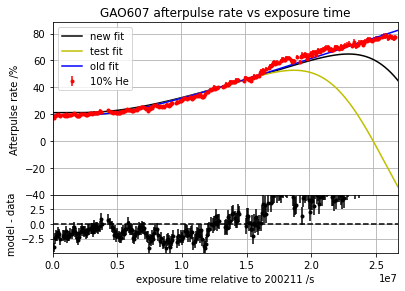

In [101]:
#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(my_x, my_y, yerr=my_y_err,fmt="r.", label="10% He")
plt.plot(x_range, model_eps(x_range, *popt_), 'k', label="new fit")
plt.plot(x_range, model_eps(x_range, *popt, 0.0000002, 2.5e7), 'y', label="test fit")
plt.plot(x_range, model(x_range, *popt), 'b', label="old fit")
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,date[-1])
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")
plt.legend()

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(my_x, my_y - model_eps(my_x, *popt_),
                                yerr=my_y_err, fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,my_x[-1])
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure time relative to 200211 /s")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_residual_eps.png")

<ipython-input-20-30bc451490a3>:11: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.xlim(0,exposure[-1])


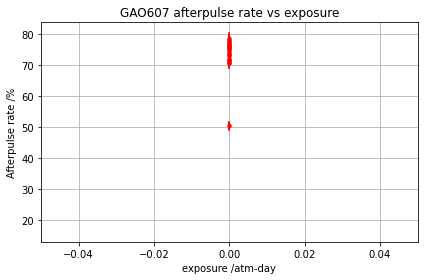

In [20]:
'''#PLOT
x_range_exp = np.linspace(0,exposure[-1],1000)
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))'''
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(exposure[mid+1:], np.array(apulse_rates[mid+1:]), yerr=np.array(apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
#plt.plot(x_range_exp, model(x_range_exp, *popt), 'k')
#frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,exposure[-1])
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure")

#Residual plot
'''frame2=fig1.add_axes((.1,.1,.8,.2))
plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')
plt.errorbar(date[mid+1:], np.array(apulse_rates[mid+1:])- model(date[mid+1:], *popt),
                                yerr=np.array(apulse_rates_err[mid+1:]), fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,date[-1])
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")'''
plt.xlabel("exposure /atm-day")
plt.tight_layout()

plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/apulse_rate_ch0_exp.png")

In [21]:
t_range = np.linspace(date[-1], date[-1]*2, 1000)

y = model(t_range, *popt)

for i in range(len(y)):
    if '{:.2}'.format(y[i]) == '1e+02':
        end_t = i
        break

end = (date[-1] + (end_t*date[-1]/1000)) /3600 /24
print(end, 'days')

375.336 days


<ipython-input-22-4f5714afe3af>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


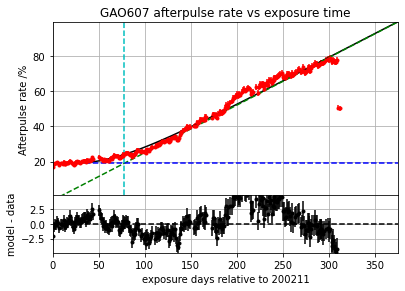

In [22]:
new_t_range = np.linspace(0, end, 1000)

#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(date_days[mid+1:], np.array(apulse_rates[mid+1:]), yerr=np.array(apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
plt.plot(new_t_range, model_day(new_t_range, *popt), 'k')
plt.plot(new_t_range, linear_days(new_t_range, popt[0], -popt[0]*popt[1]/6 + popt[2]), 'g--')
plt.axvline(popt[1]/6/3600/24, ls='--', color='c')
plt.axhline(popt[2], ls='--', color='b')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,end)
plt.ylim(1,99)
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(date_days[mid+1:], np.array(apulse_rates[mid+1:])- model(date[mid+1:], *popt),
                                yerr=np.array(apulse_rates_err[mid+1:]), fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,end)
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure days relative to 200211")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_extrap.png")

In [23]:
k = 980 * np.sqrt(1/4)
print(k)

490.0


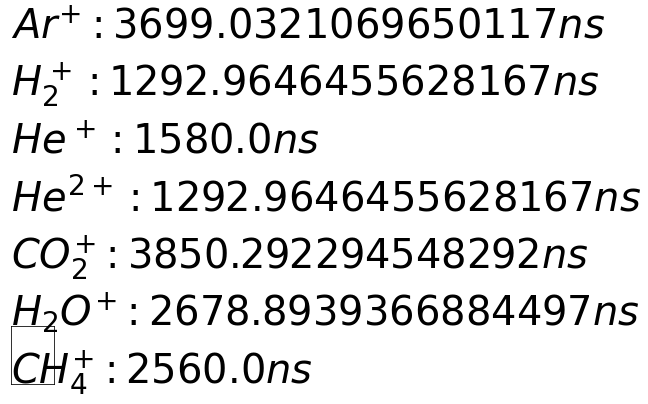

In [24]:
t_H2_1 = k * np.sqrt(2/1)
t_He_1 = k * np.sqrt(4/1)
t_He_2 = k * np.sqrt(4/2)
t_CO2_1 = k * np.sqrt(44/1)
t_H20_1 = k * np.sqrt(18/1)
t_CH4_1 = k * np.sqrt(16/1)
t_Ar_1 = k * np.sqrt(40/1)

a = "H_2^+ : " + str(t_H2_1 + 600) + ' ns'
b = "He^+ :" + str(t_He_1 + 600) + ' ns'
c = "He^{2+} :" + str(t_He_2 + 600) + ' ns'
d = "CO_2^{+} :" + str(t_CO2_1 + 600) + ' ns'
e = "H_2O^{+} :" + str(t_H20_1 + 600) + ' ns'
f = "CH_4^{+} :" + str(t_CH4_1 + 600) + ' ns'
g = "Ar^{+} :" + str(t_Ar_1 + 600) + ' ns'

ax = plt.axes([0,0,0.1,0.2])
plt.text(0,5,'$%s$' %a,size=40)
plt.text(0,4,'$%s$' %b,size=40)
plt.text(0,3,'$%s$' %c,size=40)
plt.text(0,2,'$%s$' %d,size=40)
plt.text(0,1,'$%s$' %e,size=40)
plt.text(0,0,'$%s$' %f,size=40)
plt.text(0,6,'$%s$' %g,size=40)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [25]:
V = 4*np.pi*(4*0.0254)**3/6
l = 0.001
pe = 10000
A = 4*np.pi*(4*0.0254)**2/2

L = popt[1]/6 /3600/24
D = popt[0]*l*V/pe/A
print(D,L)

1.057608624101818e-14 77.61913449217609


# Now for the He apulses

In [26]:
chi_2 = 100
n_times = 1
n = 0
for n in range(n_times):
    p_bounds = [[0,0,0],[1e5,1e10,10]]
    '''p0 = random.uniform(p_bounds[0][0],p_bounds[1][0])
    p1 = random.uniform(p_bounds[0][1],p_bounds[1][1])
    p2 = random.uniform(p_bounds[0][2],p_bounds[1][2])
    p3 = random.uniform(p_bounds[0][3],p_bounds[1][3])
    p4 = random.uniform(p_bounds[0][4],p_bounds[1][4])'''
    p0 = 0.1
    p1 = 1
    p2 = 5
    p_guess = [p0, p1, p2]
    
    popt_he, pcov_he = curve_fit(model, date[mid+1:], he_apulse_rates[mid+1:], sigma=he_apulse_rates_err[mid+1:], p0=p_guess,
                           bounds=p_bounds)
    chi_2 = chi2(he_apulse_rates[mid+1:], he_apulse_rates_err[mid+1:], model(date[mid+1:], *popt_he), len(popt_he))
   
    if chi_2 < 1:
        break


print('Param p{}: {:.8f} ± {:.8f}'.format(0, popt_he[0], np.sqrt(pcov_he[0,0])))
print('Param p{}: {:.9f} ± {:.9f}'.format(1, popt_he[1], np.sqrt(pcov_he[1,1])))
print('Param p{}: {:.1f} ± {:.1f}'.format(2, popt_he[2], np.sqrt(pcov_he[2,2])))
print('Chi2 is:', chi_2)

Param p0: 0.00000293 ± 0.00000003
Param p1: 30352526.245895214 ± 0.000000014
Param p2: 4.4 ± 0.2
Chi2 is: 8.66284667246626


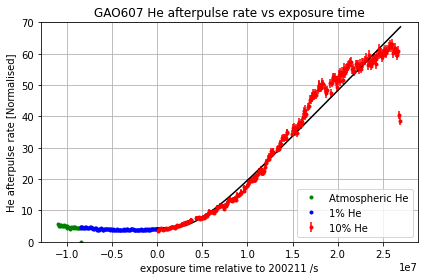

In [27]:
plt.plot(date[:start + 1], np.array(he_apulse_rates[:start + 1]),
                 "g.", label="Atmospheric He")
plt.plot(date[start+1:mid + 1], np.array(he_apulse_rates[start+1:mid + 1]),
                 "b.", label="1% He")
plt.errorbar(date[mid+1:], np.array(he_apulse_rates[mid+1:]), yerr=np.array(he_apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
x_range = np.linspace(0,date[-1],1000)
plt.plot(x_range, model(x_range, *popt_he), 'k')
#plt.axvline(date[start], 0, 100, ls='--', color='k')
#plt.axvline(date[mid], 0, 100, ls='--', color='k')
plt.xlabel("exposure time relative to 200211 /s")
plt.ylabel("He afterpulse rate [Normalised]")
plt.title("GAO607 He afterpulse rate vs exposure time")
plt.grid()
plt.ylim(0,70)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_he.png")

<ipython-input-21-0e17c6b9be13>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


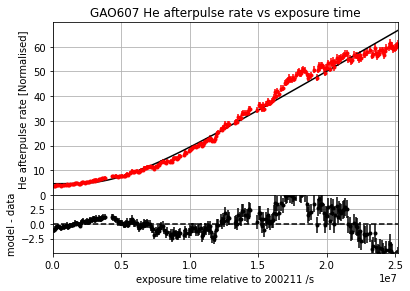

In [21]:
#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(date[mid+1:], np.array(he_apulse_rates[mid+1:]), yerr=np.array(he_apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
plt.plot(x_range, model(x_range, *popt_he), 'k')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,date[-1])
plt.grid()
plt.ylabel("He afterpulse rate [Normalised]")
plt.title("GAO607 He afterpulse rate vs exposure time")

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(date[mid+1:], np.array(he_apulse_rates[mid+1:])- model(date[mid+1:], *popt_he),
                                yerr=np.array(he_apulse_rates_err[mid+1:]), fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,date[-1])
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure time relative to 200211 /s")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_residual_he.png")

In [22]:
t_range = np.linspace(date[-1], date[-1]*2, 1000)

y = model(t_range, *popt_he)

for i in range(len(y)):
    if '{:.2}'.format(y[i]) == '1e+02':
        end_t = i
        break

end = (date[-1] + (end_t*date[-1]/1000)) /3600 /24
print(end, 'days')

411.13599999999997 days


<ipython-input-23-13632df76bc1>:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


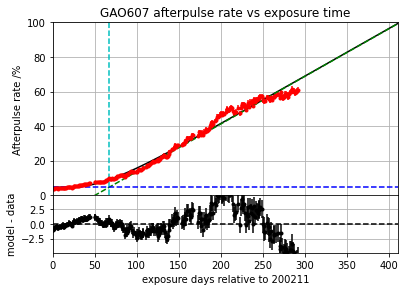

In [23]:
new_t_range = np.linspace(0, end, 1000)

#PLOT
fig1 = plt.figure(1)
#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.errorbar(date_days[mid+1:], np.array(he_apulse_rates[mid+1:]), yerr=np.array(he_apulse_rates_err[mid+1:]),
                 fmt="r.", label="10% He")
plt.plot(new_t_range, model_day(new_t_range, *popt_he), 'k')
plt.plot(new_t_range, linear_days(new_t_range, popt_he[0], -popt_he[0]*popt_he[1]/6 + popt_he[2]), 'g--')
plt.axvline(popt_he[1]/6/3600/24, ls='--', color='c')
plt.axhline(popt_he[2], ls='--', color='b')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.xlim(0,end)
plt.ylim(0,100)
plt.grid()
plt.ylabel("Afterpulse rate /%")
plt.title("GAO607 afterpulse rate vs exposure time")

#Residual plot
frame2=fig1.add_axes((.1,.1,.8,.2))
'''plt.plot(date[mid+1:], residual(np.array(apulse_rates[mid+1:]),
                                model(date[mid+1:], *popt),
                                np.array(apulse_rates_err[mid+1:])), 'k.')'''
plt.errorbar(date_days[mid+1:], np.array(he_apulse_rates[mid+1:])- model(date[mid+1:], *popt_he),
                                yerr=np.array(he_apulse_rates_err[mid+1:]), fmt='k.')
plt.ylim(-4.9,4.9)
plt.xlim(0,end)
plt.axhline(0,ls='--', color='k')
plt.grid()
plt.ylabel("model - data")
plt.xlabel("exposure days relative to 200211")
plt.tight_layout()
plt.savefig("/Users/willquinn/Desktop/pmt_output_files/summary_plots/model_he_extrap.png")

In [24]:
V = 4*np.pi*(4*0.0254)**3/6
l = 0.001
pe = 10000
A = 4*np.pi*(4*0.0254)**2/2

L = popt_he[1]/6 /3600/24
D = popt_he[0]*l*V/pe/A
print(D,L)

1.0807196500963721e-14 66.99652248088515
